# Introduction

- <a href= '#understanding'>Understanding the Dataset</a>
- <a href= '#cormatrix'>Correlation Matrix</a>
  - <a href= '#corplot'>Correlation Plot</a>
- <a href= '#factor-analysis'>Factor Analysis</a>
  - <a href= '#kmo-barlett'>KMO and Bartlett's Test</a>
    - <a href= '#kmo-test'>KMO Test</a>
    - <a href= '#barlett-test'>Bartlett's Test</a>
    - <a href= '#anti-image'>Anti-image Correlation/Covariance Matrix</a>
  - <a href= '#scree-plot'>Scree Plot</a>
    - <a href= '#parallel-analysis'>Parallel Analysis Scree Plots</a>
  - <a href= '#rotated-compmatrix'>Rotated Component Matrix</a>
    - <a href= '#graph-factor-loading'>Graph Factor Loading Matrices</a>
  - <a href= '#cronbach-alpha'>Cronbach's Alpha</a>
- <a href= '#conclusion'>Conclusion</a>

<a id='understanding'></a>

# Understanding the Dataset


In [27]:
# R Packages
packages <-
  c(
    "tidyverse",
    "ggplot2",
    "rstatix",
    "pander",
    "heplots",
    "readr",
    "psych",
    "corrplot"
  )

suppressPackageStartupMessages(lapply(packages, require, character.only = TRUE))

# Importing Data
df <- read.csv("./R/dataset/data.csv", sep = ";")


# for kaggle
# df <- read.csv("../input/airline-passenger-satisfaction/train.csv, sep = ";")

# Top 6 rows
head(df)


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

,idCount,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,v1,v2,⋯,v8,v9,v10,v11,v12,v13,v14,DepartureDelayinMinutes,ArrivalDelayinMinutes,Satisfaction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,70172,0,1,13,0,1,460,3,4,⋯,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
2,2,5047,0,0,25,1,2,235,3,2,⋯,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
3,3,110028,1,1,26,1,2,1142,2,2,⋯,5,4,3,4,4,4,5,0,0,satisfied
4,4,24026,1,1,25,1,2,562,2,5,⋯,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
5,5,119299,0,1,61,1,2,214,3,3,⋯,3,3,4,4,3,3,3,0,0,satisfied
6,6,111157,1,1,26,0,0,1180,3,4,⋯,1,3,4,4,4,4,1,0,0,neutral or dissatisfied


In [28]:
class(df)


[1] "data.frame"

In [29]:
# Structure of the data frame
str(df)


'data.frame':	103904 obs. of  25 variables:
 $ idCount                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id                     : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                 : int  0 0 1 1 0 1 0 1 1 0 ...
 $ CustomerType           : int  1 0 1 1 1 1 1 1 1 0 ...
 $ Age                    : int  13 25 26 25 61 26 47 52 41 20 ...
 $ TypeOfTravel           : int  0 1 1 1 1 0 0 1 1 1 ...
 $ Class                  : int  1 2 2 2 2 0 0 2 2 0 ...
 $ FlightDistance         : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ v1                     : int  3 3 2 2 3 3 2 4 1 3 ...
 $ v2                     : int  4 2 2 5 3 4 4 3 2 3 ...
 $ v3                     : int  3 3 2 5 3 2 2 4 2 3 ...
 $ v4                     : int  1 3 2 5 3 1 3 4 2 4 ...
 $ v5                     : int  5 1 5 2 4 1 2 5 4 2 ...
 $ v6                     : int  3 3 5 2 5 2 2 5 3 3 ...
 $ v7                     : int  5 1 5 2 5 1 2 5 3 3 ...
 $ v8                  

In [30]:
print(sapply(df, class))


                idCount                      id                  Gender 
              "integer"               "integer"               "integer" 
           CustomerType                     Age            TypeOfTravel 
              "integer"               "integer"               "integer" 
                  Class          FlightDistance                      v1 
              "integer"               "integer"               "integer" 
                     v2                      v3                      v4 
              "integer"               "integer"               "integer" 
                     v5                      v6                      v7 
              "integer"               "integer"               "integer" 
                     v8                      v9                     v10 
              "integer"               "integer"               "integer" 
                    v11                     v12                     v13 
              "integer"               "integer"    

In [31]:
# To convert all integer columns to numeric columns

df <- df %>% mutate_if(is.integer, as.numeric)

print(sapply(df, class))


                idCount                      id                  Gender 
              "numeric"               "numeric"               "numeric" 
           CustomerType                     Age            TypeOfTravel 
              "numeric"               "numeric"               "numeric" 
                  Class          FlightDistance                      v1 
              "numeric"               "numeric"               "numeric" 
                     v2                      v3                      v4 
              "numeric"               "numeric"               "numeric" 
                     v5                      v6                      v7 
              "numeric"               "numeric"               "numeric" 
                     v8                      v9                     v10 
              "numeric"               "numeric"               "numeric" 
                    v11                     v12                     v13 
              "numeric"               "numeric"    

In [32]:
dim(df)


[1] 103904     25

In [33]:
# Structure of the data frame
str(df)


'data.frame':	103904 obs. of  25 variables:
 $ idCount                : num  1 2 3 4 5 6 7 8 9 10 ...
 $ id                     : num  70172 5047 110028 24026 119299 ...
 $ Gender                 : num  0 0 1 1 0 1 0 1 1 0 ...
 $ CustomerType           : num  1 0 1 1 1 1 1 1 1 0 ...
 $ Age                    : num  13 25 26 25 61 26 47 52 41 20 ...
 $ TypeOfTravel           : num  0 1 1 1 1 0 0 1 1 1 ...
 $ Class                  : num  1 2 2 2 2 0 0 2 2 0 ...
 $ FlightDistance         : num  460 235 1142 562 214 ...
 $ v1                     : num  3 3 2 2 3 3 2 4 1 3 ...
 $ v2                     : num  4 2 2 5 3 4 4 3 2 3 ...
 $ v3                     : num  3 3 2 5 3 2 2 4 2 3 ...
 $ v4                     : num  1 3 2 5 3 1 3 4 2 4 ...
 $ v5                     : num  5 1 5 2 4 1 2 5 4 2 ...
 $ v6                     : num  3 3 5 2 5 2 2 5 3 3 ...
 $ v7                     : num  5 1 5 2 5 1 2 5 3 3 ...
 $ v8                     : num  5 1 5 2 3 1 2 5 1 2 ...
 $ v9                

In [34]:
# checking for any missing values in a dataframe
any(is.na(df))


[1] TRUE

In [35]:
# Count of missing values
sum(is.na(df))


[1] 310

In [36]:
# Position of missing values by column
sapply(df, function(x) which(is.na(x)))


$idCount
integer(0)

$id
integer(0)

$Gender
integer(0)

$CustomerType
integer(0)

$Age
integer(0)

$TypeOfTravel
integer(0)

$Class
integer(0)

$FlightDistance
integer(0)

$v1
integer(0)

$v2
integer(0)

$v3
integer(0)

$v4
integer(0)

$v5
integer(0)

$v6
integer(0)

$v7
integer(0)

$v8
integer(0)

$v9
integer(0)

$v10
integer(0)

$v11
integer(0)

$v12
integer(0)

$v13
integer(0)

$v14
integer(0)

$DepartureDelayinMinutes
integer(0)

$ArrivalDelayinMinutes
  [1]    214   1125   1530   2005   2109   2486   2631   3622   4042   4491
 [11]   4589   4689   4898   5296   5297   5497   6948   7226   8036   8422
 [21]   8934   9061   9482   9532   9552   9941  10635  10881  12037  12690
 [31]  12809  13502  14186  14302  15224  15372  15684  15861  16133  16330
 [41]  16504  16882  17235  17809  18430  18621  18725  18797  18872  19499
 [51]  19972  20050  20666  21454  21795  22203  22841  22940  22987  23034
 [61]  23506  24181  26132  26311  26339  26606  26914  27136  27239  27262
 [71]  27280  27619  27820  27905  27917  27993  28353  28495  28960  29487
 [81]  29919  30505  30530  32198  32559  32865  32917  33057  33060  33272
 [91]  33471  33871  33938  34141  34465  34678  34728  34838  34842  35249
[101]  35268  35272  35310  35341  35502  35893  35960  36065  36320  36536
[111]  37096  37576  37756  37892  38611  38678  39077  39292  39835  40100
[121]  40344  40423  40628  41080  41294  41981  42301  42439  43052  43247
[131]  43816  43830  44058  44095  44231  44327  45065  45082  45246  45308
[141]  45871  46088  46296  46564  46759  46817  46944  47062  47111  47369
[151]  47627  47637  47809  48517  48641  49755  50585  50978  51881  52127
[161]  52240  52569  52677  52879  53402  54019  54415  54938  55134  55368
[171]  55430  56040  56126  56150  56714  58176  58678  58792  59472  59680
[181]  60016  60368  60416  60434  61345  62433  62505  62607  62970  63377
[191]  63383  63707  63778  63899  64798  66423  66429  66829  66939  67343
[201]  67714  67844  67997  68113  68399  68617  68712  68914  69041  69393
[211]  69608  70168  70259  70295  70649  70939  70941  71051  71231  71558
[221]  73170  74690  75046  75335  76292  76372  76867  76956  77122  77283
[231]  78117  78236  78238  78700  78729  78930  78965  79014  80968  81063
[241]  81076  81109  81347  81455  82626  83396  83759  83881  84040  84486
[251]  84638  84711  84820  85649  85690  85739  85758  85808  85888  85950
[261]  86117  86469  86476  86907  87017  87031  87262  87907  88554  88854
[271]  89063  90444  90749  91580  91679  91901  92052  92779  93141  93188
[281]  93271  93328  93396  93875  94281  94625  94725  94760  95563  96094
[291]  96356  96947  97244  97394  97823  97916  98447  98637  98947  99815
[301] 100427 100683 100963 101243 101533 102068 102385 102553 102961 103541

$Satisfaction
integer(0)

In [37]:
df$ArrivalDelayinMinutes[is.na(df$ArrivalDelayinMinutes)] <- 0

any(is.na(df))


[1] FALSE

In [38]:
# Statistical summary
summary(df)


    idCount             id             Gender        CustomerType   
 Min.   :     1   Min.   :     1   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 25977   1st Qu.: 32534   1st Qu.:0.0000   1st Qu.:1.0000  
 Median : 51953   Median : 64857   Median :1.0000   Median :1.0000  
 Mean   : 51953   Mean   : 64924   Mean   :0.5075   Mean   :0.8173  
 3rd Qu.: 77928   3rd Qu.: 97368   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :103904   Max.   :129880   Max.   :1.0000   Max.   :1.0000  
      Age         TypeOfTravel        Class       FlightDistance       v1      
 Min.   : 7.00   Min.   :0.0000   Min.   :0.000   Min.   :  31   Min.   :0.00  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.: 414   1st Qu.:2.00  
 Median :40.00   Median :1.0000   Median :1.000   Median : 843   Median :3.00  
 Mean   :39.38   Mean   :0.6896   Mean   :1.028   Mean   :1189   Mean   :2.73  
 3rd Qu.:51.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:1743   3rd Qu.:4.00  
 Max.   :85.00   Max.   :1.0000   Max

<a id='cormatrix'></a>

# Correlation Matrix

Correlation matrix is a table showing correlation coefficients between variables.
Correlation coefficient is a statistical measure of the strength of a linear relationship between two variables.


In [39]:
data_01 <- df %>%
  as.data.frame() %>%
  dplyr::select(09:22)

data_cor <- data_01 %>%
  as.matrix() %>%
  cor()


In [40]:
list(data_cor)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v1,1.00000000,0.343844506,0.71585614,0.336248446,0.134717593,0.456970239,0.122657816,0.209321214,0.12149992,0.160472685,0.120923335,0.04319262,0.110441392,0.132697916
v2,0.34384451,1.000000000,0.43696115,0.444757139,0.004906371,0.070118712,0.011344160,-0.004861424,0.06888233,0.012441284,0.072125614,0.09333301,0.073317527,0.014292462
v3,0.71585614,0.436961154,1.00000000,0.458655466,0.031873350,0.404074212,0.030014105,0.047032286,0.03883295,0.107601383,0.038762366,0.01108076,0.035272400,0.016178525
v4,0.33624845,0.444757139,0.45865547,1.000000000,-0.001158605,0.001688022,0.003668779,0.003516727,-0.02837304,-0.005873445,0.002313445,-0.03542748,0.001680728,-0.003829942
v5,0.13471759,0.004906371,0.03187335,-0.001158605,1.000000000,0.234468256,0.574556452,0.622512032,0.05907312,0.032497633,0.034746145,0.08729901,0.033992814,0.657759734
v6,0.45697024,0.070118712,0.40407421,0.001688022,0.234468256,1.000000000,0.420210726,0.285066196,0.15544289,0.123950369,0.083280165,0.20446156,0.074572863,0.331517135
v7,0.12265782,0.011344160,0.03001411,0.003668779,0.574556452,0.420210726,1.000000000,0.610590126,0.13197122,0.105558612,0.074541614,0.19185447,0.069217798,0.678533914
v8,0.20932121,-0.004861424,0.04703229,0.003516727,0.622512032,0.285066196,0.610590126,1.000000000,0.42015270,0.299691513,0.378210005,0.12086724,0.404855182,0.691814637
v9,0.12149992,0.068882327,0.03883295,-0.028373042,0.059073117,0.155442894,0.131971218,0.420152701,1.00000000,0.355495158,0.519134194,0.24391433,0.550782172,0.123220055
v10,0.16047269,0.012441284,0.10760138,-0.005873445,0.032497633,0.123950369,0.105558612,0.299691513,0.35549516,1.000000000,0.369544092,0.15313722,0.368655679,0.096370402


<a id='corplot'></a>

## Correlation Plot


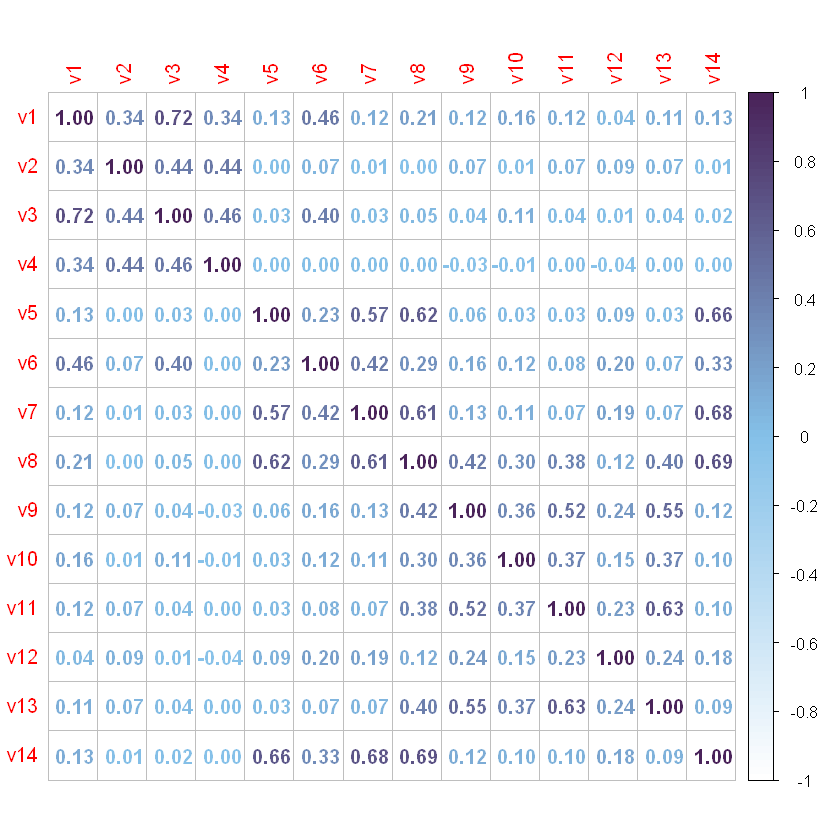

In [41]:
corrplot(data_cor,
    method = "number",
    col = colorRampPalette(c("white", "#85C1E9", "#4A235A"))(100)
)


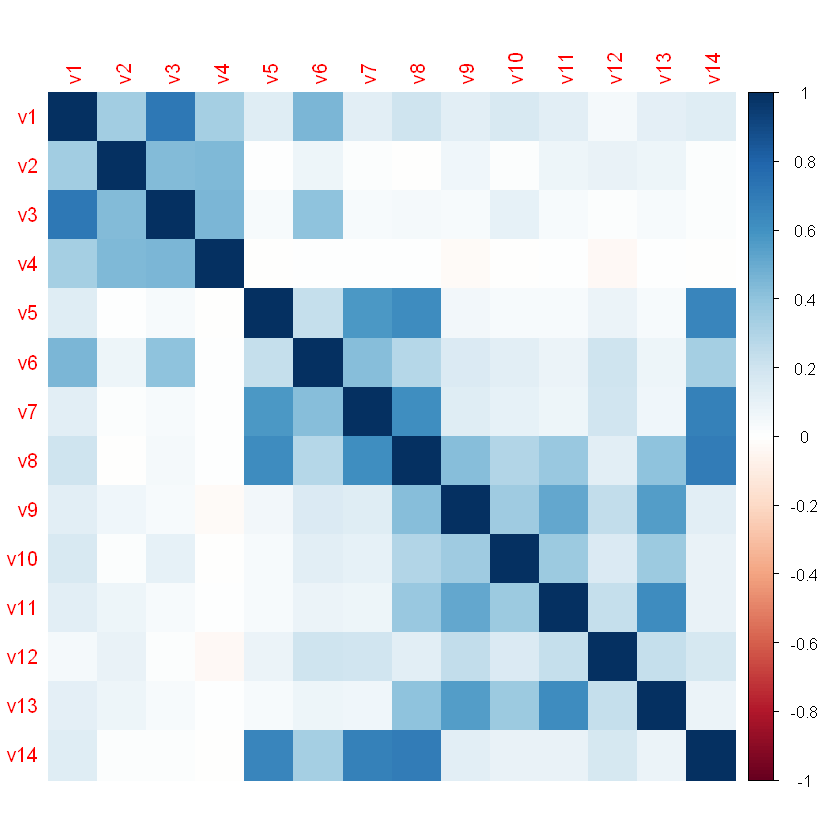

In [42]:
corrplot(data_cor,
    method = "color"
)


<a id='factor-analysis'></a>

# Factor Analysis

Factor analysis is a way of taking a chunk of data and shrinking it into a smaller dataset that is more manageable and more understandable.

<a id='kmo-barlett'></a>

## KMO and Bartlett's Test

<a id='kmo-test'></a>

### KMO Test

The Kaiser--Meyer--Olkin (KMO) test is a test used to examine the strength of the partial correlation between variables.
So it measures how convenient it is.


In [43]:
# Kaiser-Meyer-Olkin Measure of Sampling Adequacy
KMO(data_cor)


Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data_cor)
Overall MSA =  0.78
MSA for each item = 
  v1   v2   v3   v4   v5   v6   v7   v8   v9  v10  v11  v12  v13  v14 
0.74 0.75 0.68 0.71 0.84 0.74 0.83 0.77 0.83 0.89 0.81 0.70 0.78 0.82 

<u>**KMO Test Interpretation**</u><br>

If the Kaiser--Meyer--Olkin (KMO) Sampling Adequacy Measure is greater than or equal to 0.60, factor analysis is continued.
The result is 0.78, which is sufficient.

<a id='barlett-test'></a>

### Bartlett's Test

Bartlett's test of Sphericity tests the null hypothesis that the correlation matrix is an identity matrix.
That is, it is used to test the hypothesis that the correlation matrix is a unit matrix.


In [44]:
# Bartlett's Test of Sphericity
cortest.bartlett(data_cor, n = nrow(df))


$chisq
[1] 601676.9

$p.value
[1] 0

$df
[1] 91

<u>**Bartlett's Test Interpretation**</u><br>

An important statistical test (usually less than 0.05) shows that the correlation matrix is not really a unit matrix (rejection of the null hypothesis).
If the result is less than 0.05, the analysis is continued.

<a id='anti-image'></a>

### Anti-image Correlation/Covariance Matrix

The image of a variable is defined as that part which is predictable by regressing each variable on all the other variables.
So anti image is the part of the variable that cannot be predicted [ref](https://www.stata.com/manuals13/mvglossary.pdf).

In [45]:
# Anti-image Covariance

KMO(data_cor)$ImCov


0.426863607,-0.042489551,-0.218169603,-0.0298267924,-0.014264952,-0.118526190,0.035922636,-0.041530521,0.003835708,-0.026229667,-0.0127475203,0.01638336,0.0028954845,0.006554469
-0.042489551,0.700397675,-0.110087726,-0.1918995974,-0.009147909,0.072465603,-0.021941862,0.042178214,-0.042713295,0.042594429,-0.0198746825,-0.07073104,-0.0244350816,-0.026315650
-0.218169603,-0.110087726,0.379330921,-0.1455862047,-0.007359772,-0.124985047,0.028784663,0.011723763,0.013565360,-0.035440395,0.0106974170,0.02605255,0.0031223005,0.018980061
-0.029826792,-0.191899597,-0.145586205,0.6763103339,0.020266513,0.129379781,-0.036922410,-0.009225457,0.023446157,0.026190393,0.0004708161,0.02062265,0.0003334891,-0.004070642
-0.014264952,-0.009147909,-0.007359772,0.0202665133,0.464018085,0.025168734,-0.061521686,-0.121697286,0.053215195,0.053070754,0.0318830803,-0.02093519,0.0393149156,-0.098660375
-0.118526190,0.072465603,-0.124985047,0.1293797809,0.025168734,0.566084321,-0.150069555,0.022701589,-0.046908934,0.009597663,0.0055290929,-0.08734599,0.0087236475,-0.042719285
0.035922636,-0.021941862,0.028784663,-0.0369224103,-0.061521686,-0.150069555,0.426921568,-0.084251014,0.016946966,-0.008759571,0.0257559371,-0.05961288,0.0367308904,-0.104980860
-0.041530521,0.042178214,0.011723763,-0.0092254566,-0.121697286,0.022701589,-0.084251014,0.265820656,-0.103186874,-0.059686418,-0.0585027790,0.09606678,-0.0882431412,-0.124362796
0.003835708,-0.042713295,0.013565360,0.0234461569,0.053215195,-0.046908934,0.016946966,-0.103186874,0.571448513,-0.066120479,-0.0958416312,-0.08655378,-0.1151798356,0.047624454
-0.026229667,0.042594429,-0.035440395,0.0261903929,0.053070754,0.009597663,-0.008759571,-0.059686418,-0.066120479,0.777503247,-0.0753207015,-0.04663299,-0.0560831931,0.017349122
-0.012747520,-0.019874682,0.010697417,0.0004708161,0.031883080,0.005529093,0.025755937,-0.058502779,-0.095841631,-0.075320701,0.5318893243,-0.06676355,-0.1963603349,0.018033075


In [46]:
# Anti-image Correlation
library(multiUS)
antiImage(X = data_01)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v1,0.741859921,-0.07770791,-0.542176329,-0.0555122685,-0.03205223,-0.24111776,0.08414912,-0.12329017,0.007766269,-0.04552994,-0.0267528781,0.02763721,0.0063215055,0.016878616
v2,-0.077707910,0.75273127,-0.213578449,-0.2788230696,-0.01604656,0.11508507,-0.04012611,0.09775106,-0.067515295,0.05772040,-0.0325624605,-0.09314801,-0.0416471502,-0.052903652
v3,-0.542176329,-0.21357845,0.681731135,-0.2874339677,-0.01754235,-0.26971703,0.07152831,0.03692016,0.029136249,-0.06525869,0.0238154706,0.04662051,0.0072311841,0.051848044
v4,-0.055512268,-0.27882307,-0.287433968,0.7066898036,0.03617750,0.20909942,-0.06871364,-0.02175808,0.037714652,0.03611752,0.0007849964,0.02763804,0.0005784322,-0.008327867
v5,-0.032052233,-0.01604656,-0.017542351,0.0361775017,0.84090996,0.04910812,-0.13822504,-0.34651264,0.103342664,0.08835613,0.0641774094,-0.03387235,0.0823253788,-0.243679622
v6,-0.241117757,0.11508507,-0.269717033,0.2090994241,0.04910812,0.73646005,-0.30526568,0.05852229,-0.082475783,0.01446685,0.0100763371,-0.12794941,0.0165387008,-0.095527259
v7,0.084149121,-0.04012611,0.071528312,-0.0687136447,-0.13822504,-0.30526568,0.83286310,-0.25009599,0.034310682,-0.01520399,0.0540496233,-0.10055459,0.0801864990,-0.270321122
v8,-0.123290169,0.09775106,0.036920157,-0.0217580763,-0.34651264,0.05852229,-0.25009599,0.76790363,-0.264753397,-0.13128952,-0.1555863516,0.20535947,-0.2441352219,-0.405826139
v9,0.007766269,-0.06751530,0.029136249,0.0377146517,0.10334266,-0.08247578,0.03431068,-0.26475340,0.828830386,-0.09919650,-0.1738421187,-0.12619244,-0.2173360375,0.105994996
v10,-0.045529944,0.05772040,-0.065258686,0.0361175179,0.08835613,0.01446685,-0.01520399,-0.13128952,-0.099196496,0.88966489,-0.1171258116,-0.05828785,-0.0907246854,0.033103223


<a id='scree-plot'></a>

## Scree Plot

It is the plot of the eigenvalues and the number of factors in the order of subtraction.
It is used to determine the optimum number of factors to keep in the final solution.


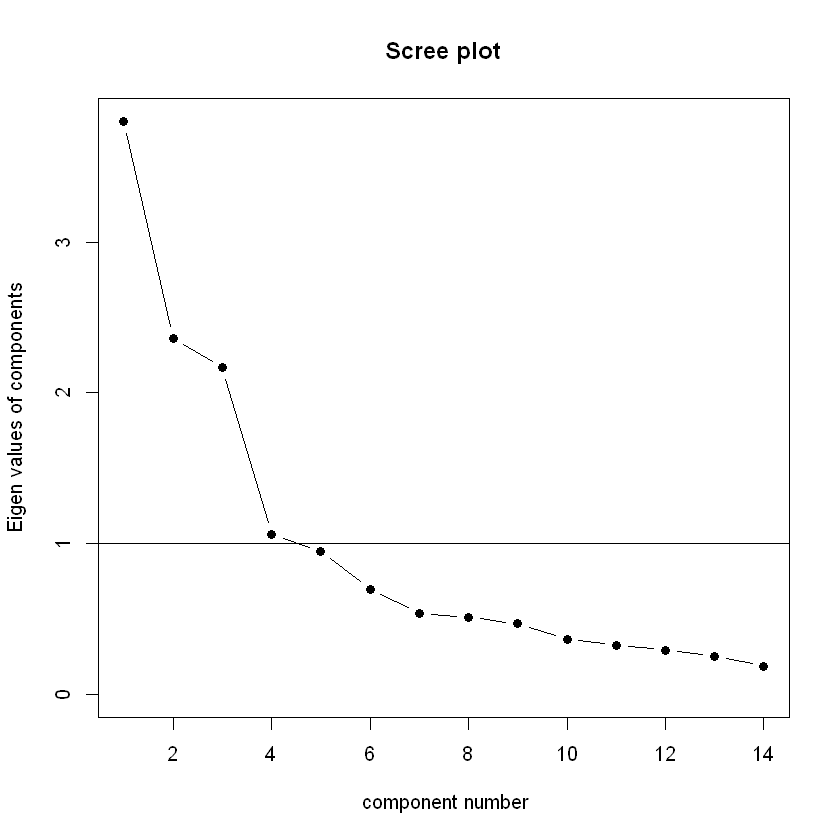

In [47]:
scree(data_cor, factors = FALSE)


<a id='parallel-analysis'></a>

### Parallel Analysis Scree Plots

Parallel analysis scree plot is a technique designed to help take some of the subjectivity out of interpreting.


Parallel analysis suggests that the number of factors =  5  and the number of components =  4 


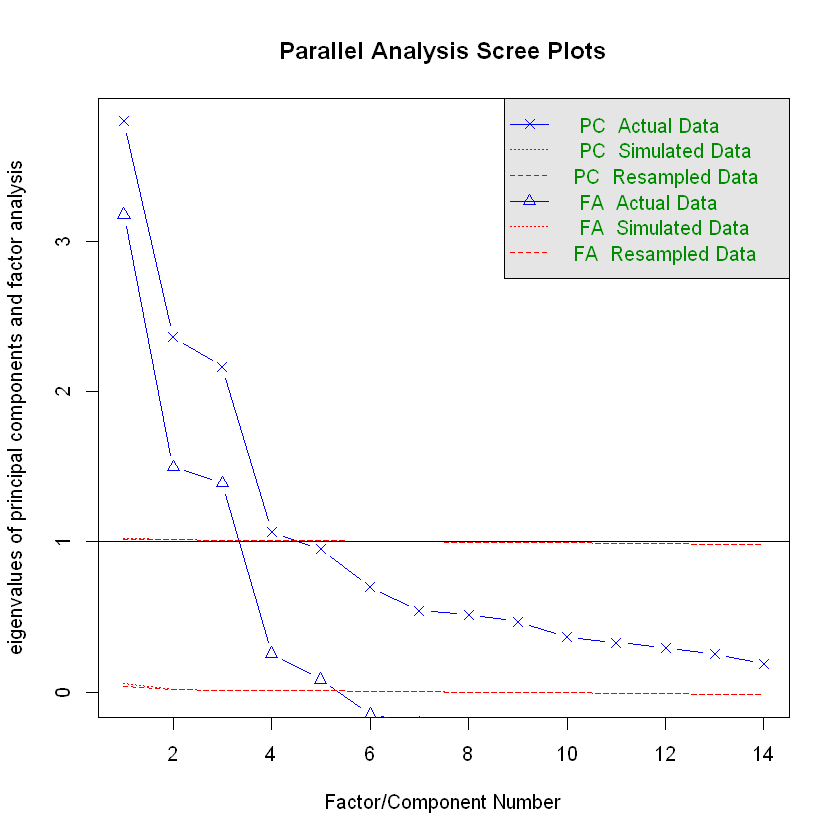

In [48]:
parallel <- fa.parallel(data_01)


<a id='rotated-compmatrix'></a>

## Rotated Component Matrix

The rotated component matrix helps in determining what the components represent.


In [49]:
data.fa <- principal(data_cor, nfactors = 3, rotate = "varimax")

data.fa$loadings



Loadings:
    RC1    RC3    RC2   
v1   0.187  0.127  0.802
v2                 0.667
v3                 0.886
v4                 0.671
v5   0.827              
v6   0.485  0.108  0.407
v7   0.849              
v8   0.760  0.454       
v9          0.782       
v10         0.610       
v11         0.821       
v12  0.166  0.378       
v13         0.837       
v14  0.880              

                 RC1   RC3   RC2
SS loadings    3.075 2.755 2.498
Proportion Var 0.220 0.197 0.178
Cumulative Var 0.220 0.416 0.595

In [50]:
print.psych(data.fa, sort = TRUE)


# ICLUST.sort(data.fa$loadings,labels = NULL,keys = FALSE,clustsort = TRUE)


Principal Components Analysis
Call: principal(r = data_cor, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
    item   RC1   RC3   RC2   h2   u2 com
v14   14  0.88  0.08 -0.01 0.78 0.22 1.0
v7     7  0.85  0.07  0.02 0.73 0.27 1.0
v5     5  0.83 -0.02 -0.01 0.68 0.32 1.0
v8     8  0.76  0.45  0.00 0.78 0.22 1.6
v6     6  0.49  0.11  0.41 0.41 0.59 2.1
v13   13  0.01  0.84  0.02 0.70 0.30 1.0
v11   11  0.02  0.82  0.02 0.68 0.32 1.0
v9     9  0.09  0.78  0.02 0.62 0.38 1.0
v10   10  0.06  0.61  0.08 0.38 0.62 1.1
v12   12  0.17  0.38  0.02 0.17 0.83 1.4
v3     3  0.04  0.02  0.89 0.79 0.21 1.0
v1     1  0.19  0.13  0.80 0.69 0.31 1.2
v4     4 -0.06 -0.06  0.67 0.46 0.54 1.0
v2     2 -0.06  0.06  0.67 0.45 0.55 1.0

                       RC1  RC3  RC2
SS loadings           3.07 2.76 2.50
Proportion Var        0.22 0.20 0.18
Cumulative Var        0.22 0.42 0.59
Proportion Explained  0.37 0.33 0.30
Cumulative Proportion 0.37 0.70 1.00

- **Extraction Method:** Principal Component Analysis.

- **Rotation Method:** Varimax with Kaiser Normalization.

  - Rotation converged in 4 iterations.

Varimax Rotation: It is used as a statistical technique used at one level of factor analysis as an attempt to clarify the relationship between factors.
In short, it tries to redistribute factor loads such that each variable measures exactly one factor.

<u>**NOTE**</u><br> For _IBM SPSS Statistics_ : `Analyze > Dimension Reduction > Factor`.
You can perform the analysis by ticking the ones you want in the "Options" section.

<a id='graph-factor-loading'></a>

### Graph Factor Loading Matrices

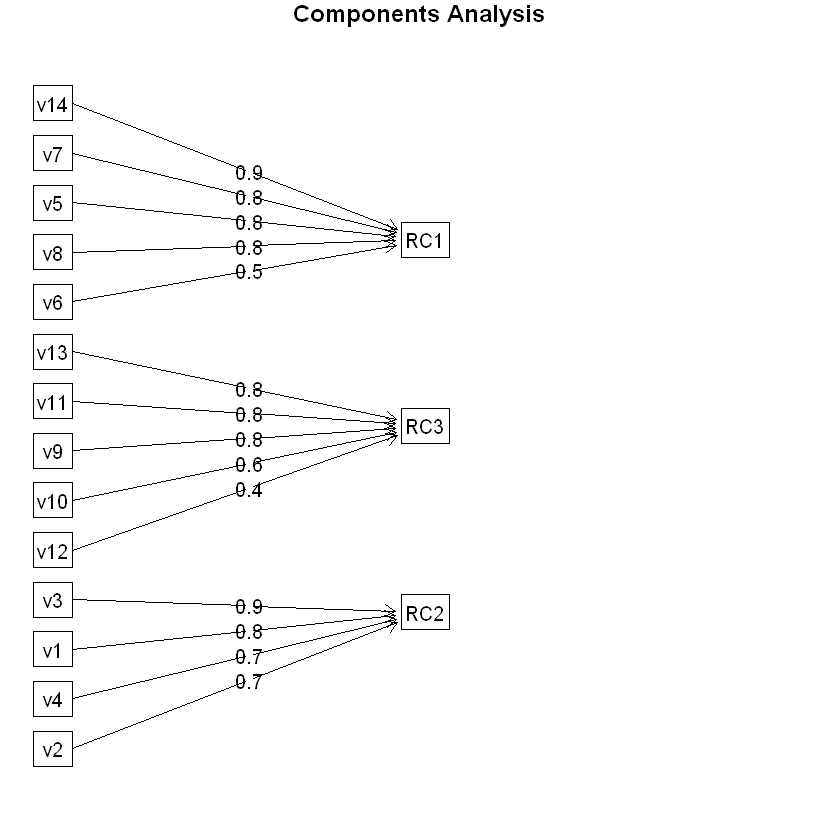

In [51]:
fa.diagram(data.fa)


<u>**Interpretation**</u><br>

v6 and v12 is a low-contribution variable.

<a id='cronbach-alpha'></a>

## Cronbach's Alpha

It helps measure the internal consistency of a set of data.
It is a reliability coefficient.
Provides verification of the consistency of a questionnaire or survey.


In [52]:
library(ltm)

rc1_alpha <- data_01[, c("v14", "v7", "v5", "v8")]
rc3_alpha <- data_01[, c("v13", "v11", "v9", "v10")]
rc2_alpha <- data_01[, c("v3", "v1", "v4", "v2")]


# rc = rotated component
cronbach.alpha(rc1_alpha)
cronbach.alpha(rc3_alpha)
cronbach.alpha(rc2_alpha)



Cronbach's alpha for the 'rc1_alpha' data-set

Items: 4
Sample units: 103904
alpha: 0.876



Cronbach's alpha for the 'rc3_alpha' data-set

Items: 4
Sample units: 103904
alpha: 0.772



Cronbach's alpha for the 'rc2_alpha' data-set

Items: 4
Sample units: 103904
alpha: 0.768


| Range   |            |
|---------|------------|
| >=0.9   | Excellent  |
| 0.8-0.9 | Good       |
| 0.7-0.8 | Acceptable |

<a id='conclusion'></a>

# Conclusion

Factor 1: **Comfort**

- Cleanliness
- Seat Comfort
- Food And Drink
- Inflight Entertainment

Factor 2: **Service**

- Ease Of Online Booking
- Inflight Wifi Service
- Gate Location
- Departure Arrival Time Convenient

Factor 3: **Convenience**

- Inflight Service
- Baggage Handling
- On Board Service
- Leg Room Service
